In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

In [2]:
SEED_VALUE = 42

np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()
print("Train:", X_train.shape,Y_train.shape)
print("Test:", X_test.shape,Y_test.shape)

Train: (404, 13) (404,)
Test: (102, 13) (102,)


In [4]:
pd.DataFrame(X_train).columns

RangeIndex(start=0, stop=13, step=1)

In [5]:
boston_features = {
    "Average Number of Rooms":5,
}
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features['Average Number of Rooms']]
print(X_test_1d.shape)

(404,)
(102,)


In [6]:
model = Sequential()
model.add(
    Dense(units=1, input_shape=(1,))
)
model.summary()

C:\Users\rinit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005),
              loss="mse")

In [8]:
history = model.fit(
    X_train_1d,
    Y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 554.6017 - val_loss: 672.5389
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 518.9620 - val_loss: 640.5750
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 491.3279 - val_loss: 610.4505
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 465.1017 - val_loss: 581.3124
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 439.7823 - val_loss: 553.0417
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 415.2986 - val_loss: 525.6205
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 391.6393 - val_loss: 499.0455
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 368.8020 - val_loss: 473.3158
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 346.7856 - val_loss: 448.4306
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 325.5892 - val_loss: 424.3894
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 305.2116 - val_loss: 401.1913
Epoch 12/101
18/18

In [9]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

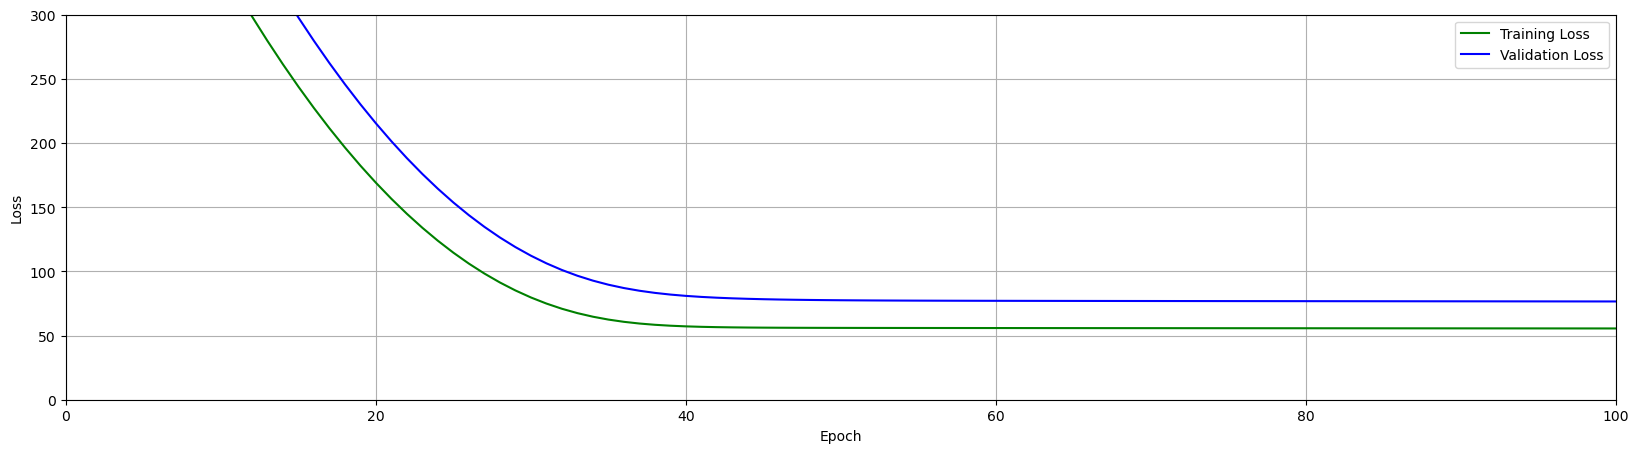

In [10]:
plot_loss(history)

In [11]:
x = [3, 4, 5, 6, 7]
y_pred = model.predict(np.array(x))
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted price of a home with 3 rooms: $12.0K
Predicted price of a home with 4 rooms: $15.1K
Predicted price of a home with 5 rooms: $18.2K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.5K


C:\Users\rinit\AppData\Local\Temp\ipykernel_23464\490122555.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")


In [12]:
x = np.linspace(3,9,10)
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [13]:
def plot_data(x_data, y_data, x, y, title=None):
    
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Actual Values', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

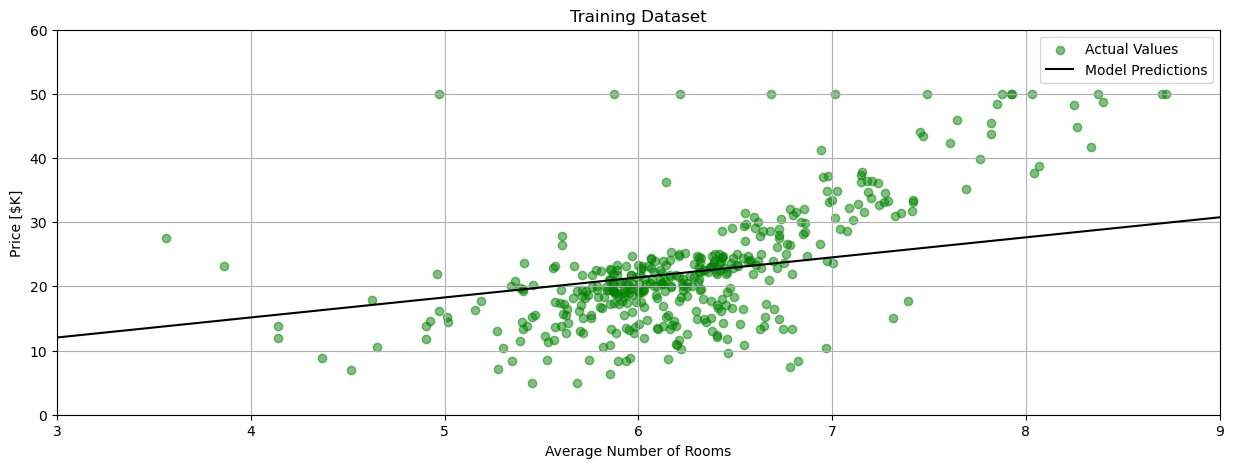

In [14]:
plot_data(X_train_1d, Y_train, x, y, title='Training Dataset')

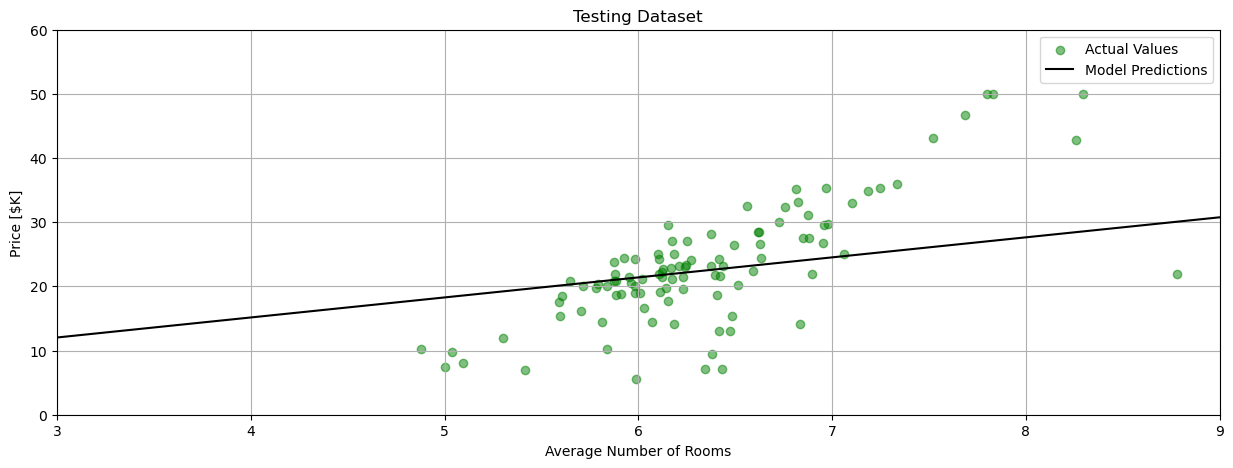

In [15]:
plot_data(X_test_1d, Y_test, x, y, title='Testing Dataset')